# Perceptron

Scikit-Learn provides a Perceptron class that implements a single-TLU
network. It can be used pretty much as you would expect—for example, on
the iris dataset

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [53]:
iris = load_iris()
X = iris.data[:, (2,3)] # petal length, petal width # type: ignore
y = (iris.target == 0).astype(np.int32) # type: ignore

In [54]:
per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [55]:
y_pred

array([0], dtype=int32)

You may have noticed that the Perceptron learning algorithm strongly
resembles Stochastic Gradient Descent. In fact, Scikit-Learn’s `Perceptron`
class is equivalent to using an `SGDClassifier` with the following
hyperparameters: `loss="perceptron"`, `learning_rate="constant"`,
`eta0=1` (the learning rate), and `penalty=None` (no regularization).

Note that contrary to Logistic Regression classifiers, Perceptrons do not
output a class probability; rather, they make predictions based on a hard
threshold. This is one reason to prefer Logistic Regression over
Perceptrons.

# Implementing MLPs with Keras

## Building an image classifier using sequential API

In [2]:
import tensorflow as tf
from tensorflow import keras

2023-11-06 12:59:02.454520: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 12:59:02.599634: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 12:59:02.600400: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-06 12:59:03.693798: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [57]:
tf.__version__

'2.13.0'

### Using keras to load dataset

In [58]:
fashion_mnist = keras.datasets.fashion_mnist

In [59]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Let’s take a look at the shape and data type of the
training set

In [60]:
X_train_full.shape

(60000, 28, 28)

In [61]:
X_train_full.dtype

dtype('uint8')

In [62]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [63]:
y_train_full

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Note that the dataset is already split into a training set and a test set, but
there is no validation set, so we’ll create one now. Additionally, since we
are going to train the neural network using Gradient Descent, we must
scale the input features. For simplicity, we’ll scale the pixel intensities
down to the 0–1 range by dividing them by 255.0 (this also converts them
to floats):

In [64]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

With MNIST, when the label is equal to 5, it means that the image
represents the handwritten digit 5. Easy. For Fashion MNIST, however, we
need the list of class names to know what we are dealing with:

In [65]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [66]:
class_names[y_train[0]]

'Coat'

In [67]:
import matplotlib.pyplot as plt

We can plot an image using Matplotlib's `imshow()` function, with `binary` colormap:

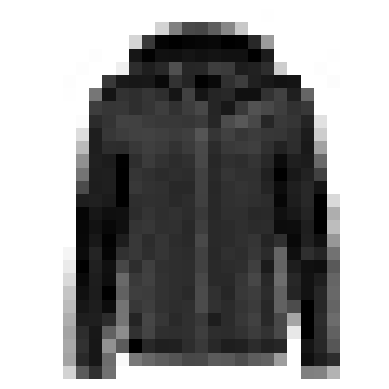

In [68]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

Let's take look at a sample of the dataset:

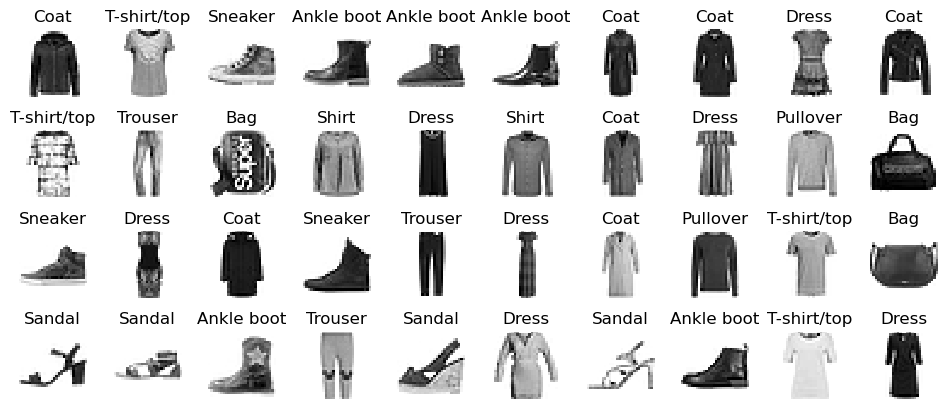

In [69]:
n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols*1.2, n_rows*1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[y_train[index]], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### Creating model using Sequential API

Now let’s build the neural network! Here is a classification MLP with two
hidden layers:

In [70]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

Let’s go through this code line by line:

- The first line creates a `Sequential model`. This is the simplest
kind of Keras model for neural networks that are just composed of
a single stack of layers connected sequentially. This is called the
Sequential API.

- Next, we build the first layer and add it to the model. It is a
`Flatten` layer whose role is to convert each input image into a 1D
array: if it receives input data `X`, it computes `X.reshape(-1, 1)`. This layer does not have any parameters; it is just there to do
some simple preprocessing. Since it is the first layer in the model,
we should specify the `input_shape`, which doesn’t include the
batch size, only the shape of the instances. 
Alternatively, we could add a `keras.layers.InputLayer` as the first layer, setting
`input_shape=[28,28]`.

- Next we add a `Dense` hidden layer with 300 neurons. It will use
the ReLU activation function. Each `Dense` layer manages its own
weight matrix, containing all the connection weights between the
neurons and their inputs. It also manages a vector of bias terms
(one per neuron). When it receives some input data, it computes the following equation:

$$ h_{w,b} (X) = \phi (XW + b) $$

- Then we add a second Dense hidden layer with 100 neurons, also
using the ReLU activation function.

- Finally, we add a `Dense` output layer with 10 neurons (one per
class), using the softmax activation function (because the classes
are exclusive).

**TIP:**

Specifying `activation="relu"` is equivalent to specifying
`activation=keras.activations.relu` . Other activation functions are available
in the `keras.activations` package,

Instead of adding the layers one by one as we just did, you can pass a list
of layers when creating the `Sequential` model:

In [71]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])  

The model's `summary()` method displays all the model's layers, including each layer's name (which is automatically generated unless we set it when creating the layer), its output shape (`None` means the batch size can be anything) and its number of parameters

In [72]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 300)               235500    
                                                                 
 dense_16 (Dense)            (None, 100)               30100     
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Note that Dense Layers often has a *lot* of parameters. For example, the first hidden layer (dense_3) has 784 * 300 connection weights, plus 300 bias terms which adds upto 2,35,500 parameters.

We can also generate image of our model using `tf.keras.utils.plot_model()`

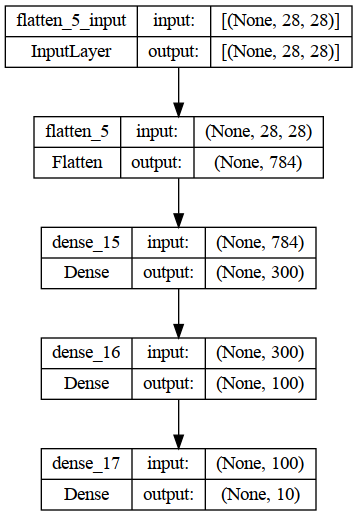

In [73]:
dot_img_file = "./tmp/model_1.png"
keras.utils.plot_model(model=model, to_file=dot_img_file, show_shapes=True, show_layer_names=True)

We can easily get model's list of layers by its index or we can fetch it by name: 

In [74]:
model.layers

In [75]:
hidden1 = model.layers[1]

In [76]:
hidden1.name

'dense_15'

In [78]:
model.get_layer("dense_15") is hidden1

True

All the parameters of a layer can be accessed using its `get_weights()` and `set_weights()` methods. For Dense layer, this includes both the connection weights and the bias terms:

In [79]:
weights, biases = hidden1.get_weights()

In [80]:
weights

array([[-0.00602906, -0.0491036 , -0.00204693, ...,  0.00364311,
         0.02467774,  0.02075263],
       [ 0.0518629 ,  0.0577731 , -0.04692625, ..., -0.01242661,
         0.02167642,  0.00859245],
       [ 0.07289164,  0.04713012,  0.02804238, ...,  0.06514415,
        -0.04705899, -0.00609297],
       ...,
       [ 0.02395564, -0.04897399,  0.01411539, ...,  0.04256253,
         0.0410171 ,  0.01472976],
       [-0.02388574,  0.0544669 ,  0.05864823, ...,  0.07365507,
        -0.06381626, -0.01083004],
       [ 0.03840263,  0.02187954, -0.05464348, ...,  0.04453439,
        -0.01297655,  0.05608183]], dtype=float32)

In [81]:
weights.shape

(784, 300)

In [82]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [83]:
biases.shape

(300,)

Note that `Dense` layer initialized the connection weights randomly (which is needed to break the symmetry, as we discussed eariler), and the biases were initialized to zeros, which is fine. 

If we ever want to use a different initialization method, we can set `kernal_initializer` (*kernel* is another name for the matrix of connection weights) or `bias_initializer` when creating the layer.

**NOTE:**

The shape of the weight matrix depends on the number of inputs. That's why it is recommended to specify the `input_shape` when creating the first layer in the `Sequential` model. However, if we do not specify the input shape, it's OK: Keras will simply wait until it knows the input shape before it actually builds the model. This will happen either when we feed it actual data (e.g., during training), or when we call its `build()` method. Until the model is really built, the layers will not have any weights, and we will not be able to do certain things (such is print the model or save the model). So if we know the input shape when creating the mode, it is best to specify it.

### Compiling the model

After creating the model, we must call its `compile()` method to specify the loss function and optimizers to use. Optionally we can specify list of extra metrices to compute during training and evaluation:

In [84]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

First, we use the `sparse_categorical_crossentropy` loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g., [0, 0, 0, 1, 0, 0, 0,0, 0] to represent class 3), then would need to use the `categorical_crossentropy` loss instead. 

If we were doing binary classfication (with one or more binary labels), then we would use the `sigmoid` (i.e., logistic) activation function in the output layer instead of `"softmax"` activation function, and we would use the `"binary_crossentropy"` loss.

**TIP:**

If we want to convert sparse labels (i.e class indices) to one-hot vector labels, use the `keras.utils.to_categorical()` function. To go the other way round, use the `np.argmax()` function with `axis=1`

Regarding the optimizer "sgd" means that we will train the model using simple Stochastic Gradient Descent. In other words, Keras will perform the backpropogation algorithm described earlier (i.e reverse-mode autodiff plus gradient descent)

### Training and Evaluating the model

Now the model is ready to be trained. For this we simply need to call its `fit()` method

In [85]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30


2023-10-25 22:09:47.303750: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 4s 2ms/step - loss: 0.7295 - accuracy: 0.7606 - val_loss: 0.6391 - val_accuracy: 0.7502
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4880 - accuracy: 0.8303 - val_loss: 0.4406 - val_accuracy: 0.8522
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4412 - accuracy: 0.8458 - val_loss: 0.4315 - val_accuracy: 0.8540
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4145 - accuracy: 0.8557 - val_loss: 0.3980 - val_accuracy: 0.8628
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3938 - accuracy: 0.8617 - val_loss: 0.4114 - val_accuracy: 0.8524
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3764 - accuracy: 0.8673 - val_loss: 0.3898 - val_accuracy: 0.8634
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3645 - accuracy: 0.8708 - val_loss: 0.3607 - val_accuracy: 0.8734
Epo

We also passed the validation set (this is optional). Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model reall performs. If the performance on the training set is much better than on the validation set, our model is overfitting the training set (or there is a bug such as data mismatch between the training set and the validaion set).

**TIP:**

Instead of passing a validation set using `validation_data` argument, we could also set `validation_split` to the ratio of the training set that we want Keras to use for validation. For example, `validation_split=0.1` tell Keras to use the last 10% of the data (before shuffling) for validation. 

If the training set is very skewed, with some classes being overrepresented and other underrepresented, it would be useful to set the `class_weight` argument while calling the `fit()` method, which would give a larger weight to underrepresented classes and a lower weight to overrepresented classes. If we need per-instance weights, set the `sample_weight` argument (it supersedes `class_weight`). Per-instance weights could be useful if some instances were labelled by experts while other were labelled by crowdsourcing platforms: we might want to give more weights to the former. We can also provide sample weights (and not class weights) for the validation set by adding them as a third item in the `validation_data` tuple. 

The `fit()` method returns a `History` object containing the training parameters (`history.params`), the list of epochs it went through (`history.epoch`), and most importantly a dictionary (`history.history`) containing the loss and the extra metrics it measured at the end of the each epoch on the training set and on the validation set (if any). We can use this dictionary to plot the learning curves.

In [86]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [87]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [88]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(history.history)

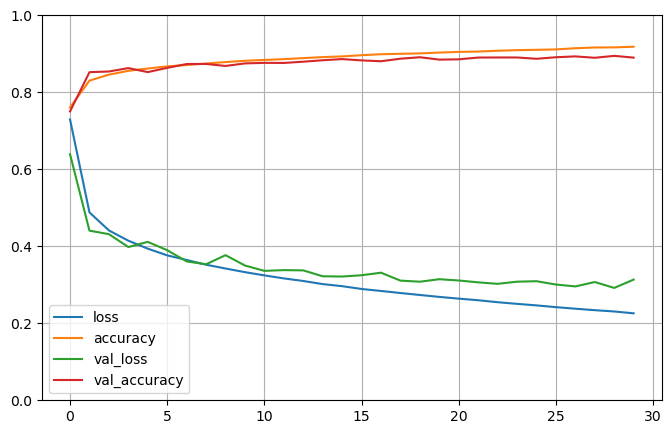

In [90]:
df.plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the vertical range to [0,1]
plt.show()

The validation curves are close to the training curves, which means that there is not too much overfitting. In this particular case, the model looks like it performed better on the validation set than on training set at the beginning of the training. But that's not the case: indeed, the validation error is computed at the *end* of each epoch, while the training error is computed using a running mean *during* each epoch. So the training curve should be shifted by half an epoch to the left. If we do that, we will see that the training and validation curves overlap almost perfectly at the beginning of the training.

**TIP:**

When plotting the training curves, it should be shifted by half and epoch to left.

Training set performance ends up beating the validation performance, as is generally the case when you train for long enough. We can tell that the model has not quite converged yet, as the validation loss is still going down, so we should probably continue training.

It's as simple as calling the `fit()` method again, since Keras just continues training where it left off (we should be able to reach close to 89% validation accuracy).

In [46]:
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
  26/1719 [..............................] - ETA: 3s - loss: 0.2129 - accuracy: 0.9231 

2023-10-25 21:53:00.558231: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 4s 2ms/step - loss: 0.2275 - accuracy: 0.9181 - val_loss: 0.3017 - val_accuracy: 0.8920
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2247 - accuracy: 0.9188 - val_loss: 0.2903 - val_accuracy: 0.8956
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2203 - accuracy: 0.9210 - val_loss: 0.3015 - val_accuracy: 0.8888
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2175 - accuracy: 0.9222 - val_loss: 0.3275 - val_accuracy: 0.8812
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2136 - accuracy: 0.9241 - val_loss: 0.3051 - val_accuracy: 0.8940
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2109 - accuracy: 0.9254 - val_loss: 0.3051 - val_accuracy: 0.8888
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2079 - accuracy: 0.9253 - val_loss: 0.3009 - val_accuracy: 0.8918
Epo

Let's plot the the graph again

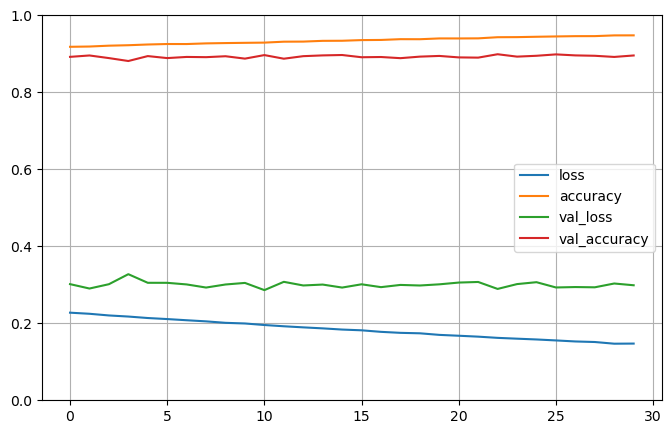

In [48]:
# pd.DataFrame(history.history).plot(figsize=(8,5))
# plt.grid(True)
# plt.gca().set_ylim(0, 1) # vertical ranget to [0,1]
# plt.show()

For some epochs validation loss was decreasing, then afterwards it keeps on increasing decreasing while training loss is decreasing. There is much gap between validation loss and training loss. This means our model is overfitting.

If we are not satisfied with the performance of our model, we should go back and tune the hyperparameters. The first one to check is the learning rate. If that doesn't help, try another optimizer (and always retune the learning rate after changing any hyperparameter). If the performance is still not great, then try tuning the model hyperparameters such as the number of layers, the number of neurons per layer and the type of activation functions to use for each hidden layer. We can also try tuning other hyperparameters, such as the batch size (it can be set in `fit()` method using the `batch_size` argument, which defaults to 32). Once we are satisfied with our model's validation accuracy, we should evalulate on test set to estimate the generalization error before we deploy model to production. 

We can easily do this using the `evaluate()` method.

In [95]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 62.5582 - accuracy: 0.8536


[62.55824279785156, 0.853600025177002]

It is common to get slightly lower performance on the test set than on the validation set, because the hyperparameters are tuned on the validation set, not the test set.

### Using the model to predict

In [105]:
X_new = X_test[:3]# since we don't have new instances, we will use first three instances of the test set
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 17ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

If we only care about the class with highest estimated probability (even if that probability is quite low), then we can use this:

In [106]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 16ms/step


array([9, 2, 1])

In [107]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [108]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Let's plot the images to check the same:

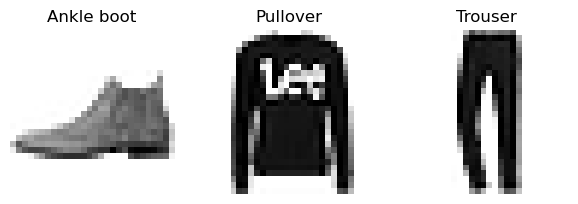

In [109]:
plt.figure(figsize=(7.2, 2.4))

for index, image in enumerate(X_new):
    plt.subplot(1, 3, index+1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis("off")
    plt.title(class_names[y_test[index]], fontsize=12)
    
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Building a Regression MLP using Sequential API

Let's switch to California Housing problem and tackle it using a regression neural network. For simplicity we will use Scikit-Learn's dataset. This dataset is simpler than the one we used in [Chapter 2](./02-Housing.ipynb), since it only contains the numerical features (there is no `ocean_proximity` feature), and there is no missing value.

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.transform(X_test)

Using the Sequential model to build, train, evaluate and use a regression MLP to make predictions is quite similar to what we did for classification. The main difference are the fact that the output layer has a single neuron (since we only want to predict single value) and uses no activation function, and the loss function is the mean squared error. Since the dataset is quite noisy, we just use a single hidden layer with fewer neuron than before, to avoid overfitting:

In [111]:
np.random.seed(42)
tf.random.set_seed(42)

In [122]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

In [123]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [124]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.2440 - val_loss: 0.9720
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8043 - val_loss: 0.7234
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6834 - val_loss: 0.6663
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6234 - val_loss: 0.6367
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5949 - val_loss: 0.6082
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5722 - val_loss: 0.5895
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5643 - val_loss: 0.5775
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5415 - val_loss: 0.5592
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5359 - val_loss: 0.5575
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5222 - val_loss: 0.5481

In [125]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 959us/step - loss: 1.2945


In [126]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 38ms/step


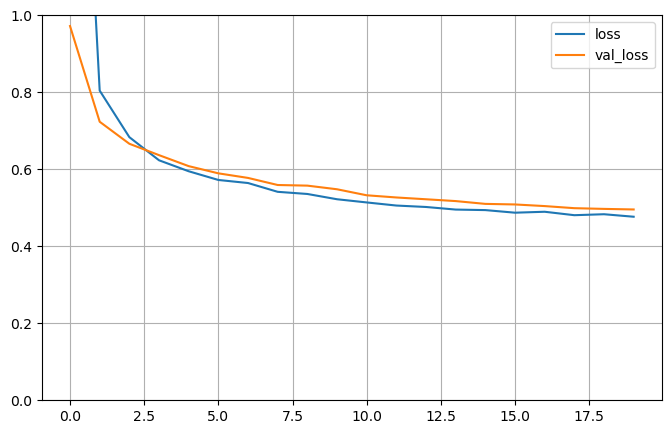

In [130]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [128]:
y_pred

array([[1.5660355],
       [2.4383204],
       [1.4533849]], dtype=float32)

Sequential API is quite easy to use. However, although Sequential models are extremely common, it is sometimes useful to build neural networks with more complex topologies or with multiple inputs or outputs. For this purpose, Keras offers the Functional API

## Building Complex Models using Functional API

[Refer notes for brief intro]

Let's build such neural network to tackle California housing dataset.

In [5]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

Let's go through each line of the code:

- First, we need to create an `Input` object. This is a specification of the kind of input the model will get, including its `shape` and `dtype`. A model may have multiple inputs, as we will see shortly

- Next, we create a `Dense` layer with 30 neurons, using the ReLU activation function. As soon as it is created, notice that we call it like a function, passing it the input. This is why it is called the Functional API. Note that we are just telling Keras how it should connect the layers together; no actual data is being processed yet. 

- We then create a second hidden layer, and again we use it as a function. Note that we pass it the output of the first hidden layer.

- Next, we create a `Concatenate` layer, and once again we immediately use it like a function, to concatenate the input and the output of the second hidden layer.

- Then we create the output layer, with a single neuron and no activation function, and we call it like a function, passing the result of the concatenation

- Lastly, we create a Keras `Model`, specifying which inputs and outputs to use.

Once we have built the Keras model, everything is exactly like earlier: compile the model, train it, evalulate it and use it to make predictions.

But what if we want to send a subset of the features through wide path and different subset (possibly overlapping) through the deep path like this:

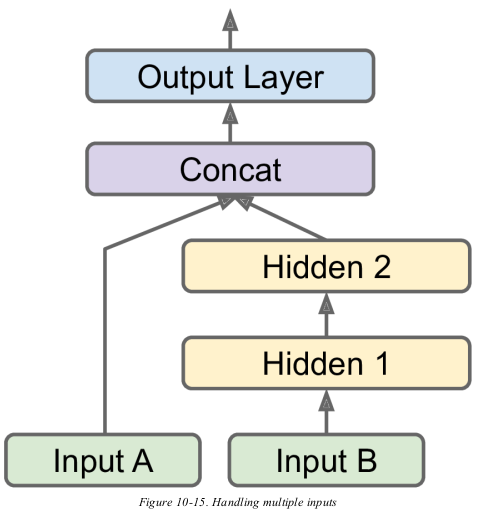

In this case, one solution is to use multiple inputs. For example, suppose we want to send five features through wide path (features 0 to 4), and six features through the deep path (features 2 to 7):

In [6]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="Output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

We should name at least the most important layers, especially when the model gets a bit complex like this. Note that we can compile the model as usual, but when we call the `fit()` method, instead of passing a single input matrix `X_train`, we must pass a pair of matrices (X_train_A, X_train_B): one per input. The same is true for `X_valid` and also for `X_test` and `X_new` when er call `evaluate()` or `predict()`. 

Alternatively , we can pass a dictionary mapping the input names to the input values, like `{ "wide_input": X_train_A, "deep_input": X_train_B}`. This is especially useful when there are many inputs, to avoid getting the order wrong.

In [13]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [138]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6085 - val_loss: 0.6138
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6556 - val_loss: 0.5438
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5327 - val_loss: 0.6047
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4579 - val_loss: 0.7687
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4388 - val_loss: 0.9804
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4284 - val_loss: 1.1942
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4321 - val_loss: 1.2425
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4240 - val_loss: 1.6912
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4088 - val_loss: 1.7153
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4009 - val_loss: 2.2448

There are many use cases in which we may want to have multiple outputs:

- The task may demand it. For instance, we may want to locate and classify the main object in picture. This is both regression task (finding the coordinates of the object's center, as well as its width and height) and a classification task.

- Similarly, we may have multiple independent tasks based on the same data. Sure, we could train one neural network per task, but in many cases we will get better results on all tasks by training a single neural network with one output per task. This is because the neural network can learn features in the data that are useful across tasks. For eg: we could perform *multitask classification* on pictures of faces, using one output to classify the person's facial expression (smiling, surprised, etc) and another output to identify whether they are wearing glasses or not

- Another use case is as a regularization technique (i.e., a training constraint) whose objective is to reduce overfitting and thus improve the model's abilitiy to generalize). For eg: we may want to add some auxiliary outputs in a neural network architecture to ensure that the underlying part of the newtork learns something useful on its own, without relying on the rest of the network.

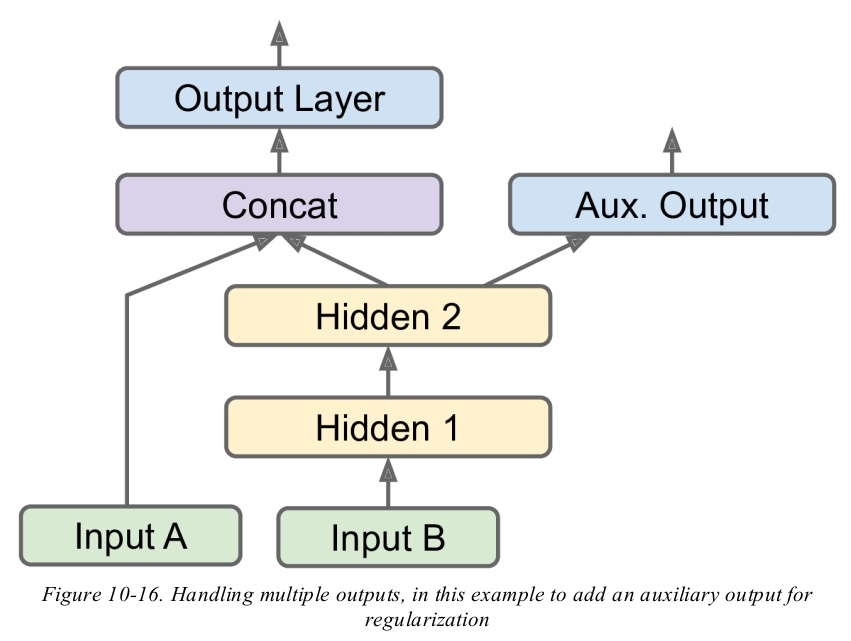

Adding extra layers is quite easy: just connect them to the appropriate layers and add them to our model's list of outputs. For eg: Following code build the network represented in above figure:

In [16]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

Each output will need its own loss function. Therefore, when we compile the model, we should pass a list of losses (if we pass a single loss, Keras will assume that the same loss must be used for all outputs). By default, Keras will compute all these losses and simply add them to get the final loss used for training. We care much more about the main output than the auxiliary output (at it is just for regularization), so we want to give the main output's loss a much greater weight. It is possible to set all the loss weights when compiling the model:

In [20]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

# Alternatively, we can pass a dictionary that maps each output name to the corresponding
# loss. Just like for the inputs, this is useful when there are multiple outputs, to avoid gettingthe order wrong. 
# The loss weights and metrics (discussed shortly) can also be set using
# dictionaries.

Now when we train the model, we need to provide labels for each output. In this example, the main output and the auxiliary output should try to predict the same thing, so they should use the same labels. So instead of passing `y_train`, we need to pass `(y_train, y_train)` (and the same goes for `y_valid` and `y_test`)

In [22]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20, 
                   validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.2264 - main_output_loss: 2.0013 - aux_output_loss: 4.2521 - val_loss: 1.1629 - val_main_output_loss: 0.9084 - val_aux_output_loss: 3.4533
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.9853 - main_output_loss: 0.7809 - aux_output_loss: 2.8249 - val_loss: 0.9369 - val_main_output_loss: 0.7705 - val_aux_output_loss: 2.4346
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8422 - main_output_loss: 0.7048 - aux_output_loss: 2.0792 - val_loss: 0.8357 - val_main_output_loss: 0.7179 - val_aux_output_loss: 1.8960
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7684 - main_output_loss: 0.6655 - aux_output_loss: 1.6946 - val_loss: 0.7791 - val_main_output_loss: 0.6845 - val_aux_output_loss: 1.6300
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7250 - main_output_loss: 0.6380 - aux_output_loss: 1.5081 - val_loss

When we evaluate the model, Keras will return the total loss, as well as all the individual losses:

In [23]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.5562 - main_output_loss: 0.4947 - aux_output_loss: 1.1093


Similarly, the `predict()` method will return predictions for each output:

In [24]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 76ms/step


Let's look at the last way we can build Keras Models.

## Using the Subclassing API to Build Dynamic Models

Both Sequential API and the Functional API are declarative: we start by declaring which layers we want to use and how they should be connected, and only then we can start feeding the model some data for training or inference. This has many advantages: the model can easily be saved, cloned and shared; its structure can be displayed and analyzed; the framework can infer shapes and check types, so errors can be caught early (i.e., before any data goes through the model). It's also easy to debug since the whole model is a static graph of layers.

But the flip side is that: it is static. Some models involve loops, varying shapes, conditional branching and other dynamic behaviours. For such cases, or simply if we prefer a more imperative programming style, the Subclassing API is there for us!

Simply subclass the `Model` class, create the layers we need in the constructor, and use them to perform the computations we want in the `call()` method. For example, creating an instance of the following `WideAndDeepModel` class gives us an equivalent model to the one we just built with Functional API. We can then compile it, evaluate it, and use it to make predictions, exactly like we just did:

In [25]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # handles standard args (e.g., name)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    
model = WideAndDeepModel()

This example looks very much like the Functional API, except we do not need to create the inputs; we just use the `input` argument to the `call()` method, and we seperate the creation of layers in the constructor from thier usage in the `call()` method. The big difference is that we can do pretty much anything we want in the `call()` method: `for` loops, `if` statements, low-level TensorFlow Operations, etc.

This extra flexibility comes with a cost: our model's architecture is hidden within `call()` method, so Keras cannot easily inspect it; it cannot save or clone it; and when we call the `summary()` method, we only get a list of layers, without any information on how they are connected to each other. Moreover, Keras cannot check types and shapes ahead of time, and it is easier to make mistakes. So unless we need this extra flexibility, we should probably stick to the Sequential API or the Functional API

**TIP:**

Keras models can be used just like regular layers, so we can easily combine them to build complex architectures. 

## Saving and Restoring Model

In [32]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [33]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 2.1291 - val_loss: 0.9518
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8059 - val_loss: 0.7592
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7182 - val_loss: 0.7125
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6806 - val_loss: 0.6788
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6491 - val_loss: 0.6479
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6221 - val_loss: 0.6234
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5977 - val_loss: 0.5993
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5758 - val_loss: 0.5785
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5571 - val_loss: 0.5610
Epoch 10/10
162/162 [==============================] - 0s 846us/step - loss: 0.5205


In [34]:
model.save("saved_models/my_keras_model.h5")

/home/dell/anaconda3/envs/latest/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Keras will use the HDF5 format to save both the model's architecture (including every layer's hyperparameters) and the values of all the model parameters for every layer (e.g., connection weights and biases). It also saves the optimizer (including its hyperparameters and any state it may have).

Loading the model is just as easy:

In [35]:
model = keras.models.load_model("saved_models/my_keras_model.h5")

In [37]:
X_new = X_train[:3]
model.predict(X_new)

1/1 [==============================] - 0s 46ms/step


array([[1.7340379],
       [1.9508775],
       [1.4542421]], dtype=float32)

**Warning:**

This will work when using the Sequential API or the Functional API, but unfortunately not when using model subclassing. We can use `save_weights()` and `load_weights()` to at least save and restore the model parameters, but we will need to save and restore everything ourself.

In [40]:
model.save_weights("saved_models/my_keras_weights.ckpt")

In [41]:
model.load_weights("saved_models/my_keras_weights.ckpt")

But what if training lasts several hours? This is quite common, especially when training on large datasets. In this case, we should not only save our model at the end of training but also save checkpoints at regular intervals during training, to avoid losing everything if our computer crashes. But how can we tell the `fit()` method to save checkpoints? Use callbacks.

## Using Callbacks

The `fit()` method accepts a `callbacks` argument that lets us specify a list of objects that Keras will call at the start and end of training, at the start and end of each epoch, and even before and after processing each batch. For eg, the `ModelCheckpoint` callback saves checkpoints of our model at regular intervals during training, by default at the end of each epoch:

In [42]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [45]:
model.compile(loss="mse",
             optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("saved_models/my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.0556
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7567
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6752
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6401
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6151
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5932
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5756
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5594
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5469
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5339


Moreover, if we use a validation set during training, we can set `save_best_only=True` when creating the `ModelCheckPoint`. In this case, it will only save our model when its performance on the validation set is best so far. This way, we do not need to worry about training for too long and overfitting the training set: simply restore the last saved model after training, and this will be the best model on the validation set. The following code is simple way to implement early stopping:

In [13]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("saved_models/my_keras_model.h5") # roll back to best model

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6246 - val_loss: 0.5343
Epoch 2/10
 79/363 [=====>........................] - ETA: 0s - loss: 0.4225

/home/dell/anaconda3/envs/latest/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


363/363 [==============================] - 1s 1ms/step - loss: 0.4078 - val_loss: 0.4007
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3690 - val_loss: 0.4170
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3582 - val_loss: 0.3782
Epoch 5/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3508 - val_loss: 0.3773
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3452 - val_loss: 0.3777
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3380 - val_loss: 0.3568
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3280 - val_loss: 0.3828
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3243 - val_loss: 0.3712
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3238 - val_loss: 0.3753


Another way to implement early stopping is to simply use the `EarlyStopping` callback. It will interrupt training when it measures no progress on the validation set for number of epochs (defined by `patience` argument), and it will optinally rollback to the best model. We can combine both callbacks to save checkpoints of our model (in case our computer crashes) and interrupt training early when there is no more progress (to avoid wasting time and resources).

In [47]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=[X_valid, y_valid],
                   callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5240 - val_loss: 0.5332
Epoch 2/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5143 - val_loss: 0.5223
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5052 - val_loss: 0.5162
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4969 - val_loss: 0.5074
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4916 - val_loss: 0.5030
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4843 - val_loss: 0.4992
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4791 - val_loss: 0.4952
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4732 - val_loss: 0.4898
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4692 - val_loss: 0.4913
Epoch 10/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4642 - val_lo

The number of epochs can be set to a large value since training will stop automatically when there is no more progress. In this case, there is no need to restore the best model saved because the `EarlyStopping` callback will keep track of the best weights and restore them for us at the end of training

If we need extra control, we can easily write our own callbacks. As an example of how to do that, the following custom callback will display the ratio between the validation loss and the training loss during training (e.g., to detect overfitting)

In [48]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train:{:2f}".format(logs["val_loss"]/logs["loss"]))

In [50]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid),
                   callbacks=[val_train_ratio_cb])

341/363 [===========================>..] - ETA: 0s - loss: 0.3489
val/train:1.231860
363/363 [==============================] - 1s 1ms/step - loss: 0.3477 - val_loss: 0.4283


As we might expect, we can implement `on_train_begin()`,
`on_train_end()`, `on_epoch_begin()`, `on_epoch_end()`,
`on_batch_begin()`, `and on_batch_end()`. Callbacks can also be used
during evaluation and predictions, should we ever need them (e.g., for
debugging). For evaluation, you should implement `on_test_begin()`,
`on_test_end()`, `on_test_batch_begin()`, or `on_test_batch_end()`
(called by `evaluate()`), and for prediction we should implement
`on_predict_begin()`, `on_predict_end()`, `on_predict_batch_begin()`,
or `on_predict_batch_end()` (called by `predict()`).

## Using Tensorboard for Visualization

Tensorboard is a great interactive tool that we can use to view the learning curves during training, compare learning curves b/w multiple runs, visualize the computation graph, analyze training statistics, view images generated by our model, visualize complex multidimensional data projected down to 3D and automatically clustered for us and more! This tools comes automatically when we install TensorFlow.

To use Tensorboard, we must modify our program so that it outputs the data we want to visualize to special binary log files called *event files*. Each binary data record is called a *summary*. The Tensorboard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations: this allows us to visualize live data (with a short delay), such as the learning curves during training. In general, we want to point the Tensorboard server to a root log directory and configure our program so that it writes to different subdirectory every time it runs. This way, the same Tensorboard server instance will allow us to visualize and compare data from multiple runs of our program, without getting everything mixed up.

Let's start by defining the root log directory we will use for our TensorBoard logs, plus a small function that will generate a subdirectory path based on the current date and time so that it's different at every run. We may want to include extra information in the log directory name, such as hyperparameter values that we are testing, to make it easier to know what we are looking at in TensorBoard:

In [3]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2023_11_06-13_01_56'

In [4]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [5]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

The good news is that Keras provides a nice `TensorBoard()` callback:

In [8]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.5062 - val_loss: 0.7888
Epoch 2/30
363/363 [==============================] - 1s 1ms/step - loss: 0.7445 - val_loss: 0.6976
Epoch 3/30
363/363 [==============================] - 1s 1ms/step - loss: 0.6809 - val_loss: 0.6570
Epoch 4/30
363/363 [==============================] - 1s 1ms/step - loss: 0.6417 - val_loss: 0.6267
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 0.6121 - val_loss: 0.6001
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5881 - val_loss: 0.5829
Epoch 7/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5686 - val_loss: 0.5669
Epoch 8/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5523 - val_loss: 0.5541
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5384 - val_loss: 0.5415
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: 0.5271 - val_loss: 0.5327

And that's all there is to it! It could hardly be easier to use. If we run this code, the `TensorBoard()` callback will take care of creating the log directory for us (along with its parent directories if needed), and during training it will create event files and write summaries to them. After running the program a second time (perhaps changing some hyperparameter value), we will end up with a directory structure similar to this one:

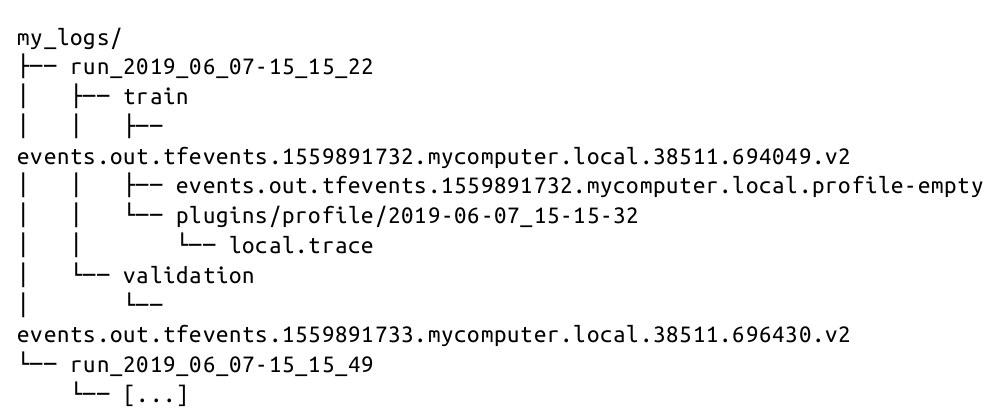

There's one directory per run, each containing one sub directory for training logs and validation logs. Both contains event files, but the training logs also include profiling traces: this allows TensorBoard to show us exactly how much time the model spent on each part of our model, across all devices, which is great for locating performance bottlenecks.

Let's change the model hyperparameters and run it again.

In [9]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2023_11_06-13_03_24'

In [10]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [14]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5179 - val_loss: 0.5257
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5076 - val_loss: 0.5179
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4991 - val_loss: 0.5114
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4915 - val_loss: 0.5069
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4863 - val_loss: 0.4988
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4794 - val_loss: 0.4947
Epoch 7/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4746 - val_loss: 0.4911
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4699 - val_loss: 0.4872
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4660 - val_loss: 0.4834
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4629 - val_loss: 0.4801

Next we need to start the TensorBoard server. One way to do this is by running a command in terminal. Run the following command at the root of the project:
```bash
    tensorboard --logdir=./my_logs --port=6006
```

Once the server is up, we can open a web browser and go to http://localhost:6006. Now click on the SCALARS tab to view the learning curves. At the bottom left, select the logs we want to visualize (e.g., the training logs from the first and second run), and click `epoch_loss` scalar. Notice that the training loss went down nicely during both runs, but the second run went down much faster. Indeed we need a learning rate of 0.05 (`optimizer=keras.optimizers.SGD(learning_rate=0.05)`) instead of 0.001.

We can also visualize the whole graph, the learned weights (projected to 3D), or the profiling traces. The `TensorBoard()` callback has options to log extra data too, such as embeddings.

Additionally, TensorFlow offers a lower-level API in the `tf.summary` package. The following code creates a `SummaryWriter` using the `create_file_writer()` function, and it uses this writer as a context to log scalers, histograms, images, audio and text, all of which can then be visualized using TensorBoard:

In [16]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir) # create_file_writer() return SummaryWriter Object

In [20]:
with writer.as_default(): # as_default returns a context manager that enables summary writing
    for step in range(1, 1000+1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100)+2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32x32 images
        tf.summary.image("my_images", images*step / 1000, step=step)
        texts = ["The step is " + str(step), "It's square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

## Fine-Tuning Neural Networks Hyperparameters

With the flexibility of Neural Networks, not only we can use any imaginable network architecture, but even in simple MLP we can change the number of layers, the number of neurons per layer, the type of activation function to use in each layer, the weight initialization logic and much more. How do we know what combination of hyperparameters is the best for our task?

One option is to simply try many combinations of hyperparameters and see which one works best on our validation set( or use K-Fold cross-validation). For example, we can use `GridSearchCV` or `RandomizedSearchCV` to explore the hyperparameter space, as we did in [Chapter-2](./02-Housing.ipynb). To do this, we need to wrap our Keras models in objects that mimic regular Scikit-Learn Regressors. 

The first step is to create a function that will build and complie a Keras model, given a set of hyperparameters:

In [49]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

This function creates a simple `Sequential` model for univariate regression (only one output neuron), with the given number of hidden layers and neurons, and compiles it using an SGD optimizier configured with a specified learning rate. It is good practice to provide reasonable defaults to as many hyperparameters as we can, as Scikit-Learn does.

Next let's create a `KerasRegressor` based on this `build_model()` function:

In [32]:
from scikeras.wrappers import KerasRegressor

`tf.keras.wrappers.scikit_learn.KerasRegressor` won't work because `scikit_learn` wrapper has been deprecated from the tf. SciKeras is derived from and API compatible with `tf.keras.wrappers.scikit_learn`. 

In [50]:
keras_reg = KerasRegressor(build_model)

The `KerasRegressor` object is a thin wrapper around the Keras model built using `build_model()`. Since we did not specify any hyperparameters when creating it, it will use default hyperparameters we defined in `build_model()`. Now we can use this object like a regular Scikit-Learn regressor: we can train it using `fit()` method, then evaluate it using its `score()` method, and use it to make predictions using its `predict()` method :

In [34]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
             callbacks=[keras.callbacks.EarlyStopping(patience=100)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.8113 - val_loss: 0.5913
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5218 - val_loss: 1.3040
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 2.2481 - val_loss: 62.5000
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 5.3439 - val_loss: 0.4621
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4010 - val_loss: 0.4181
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3857 - val_loss: 0.4136
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3762 - val_loss: 0.4029
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3677 - val_loss: 0.4102
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3653 - val_loss: 0.4064
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3639 - val_l

KerasRegressor(
	model=<function build_model at 0x7f1642ab7060>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)

In [35]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 658us/step


In [37]:
X_new = X_train[:3]
y_pred = keras_reg.predict(X_new)

1/1 [==============================] - 0s 20ms/step


In [38]:
mse_test, y_pred

(0.7354625229924433, array([1.5351176, 3.0163293, 2.5427394], dtype=float32))

Note that any extra parameter that we pass to `fit()` method will get passed to the underlying Keras model. Also not that the score will be the opposite of the MSE because Scikit-Learn wants scores, not losses(i.e., higher should be better).

We don't want to train and evaluate a single model like this, though we want to train hundreds of variants and see which one performs best on the validation set. Since there are many hyperparameters, it is preferable to use a randomized search rather than grid search.

Let's try to explore the number of hidden layers, the number of neurons and the learning rate:

In [51]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2).rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


ValueError: Invalid parameter n_neurons for estimator KerasRegressor.
This issue can likely be resolved by setting this parameter in the KerasRegressor constructor:
`KerasRegressor(n_neurons=77)`
Check the list of available parameters with `estimator.get_params().keys()`

> Currently there is issue with the `scikeras` wrapper library. Once I get the solution to this problem, will update the code. This sucks tbh :( . [Refer this for solution](https://github.com/adriangb/scikeras/issues/312#event-10905922755)

`RandomizedSearchCV` uses K-Fold cross-validation, so it does not use `X_valid` and `y_valid`, which are only used for early stopping.

The exploration may last several hours. When it's over, we can access the best params found, the best score and trained Keras model like this:
```
>>> rnd_search_cv.best_params_
>>> rnd_search_cv.best_score_
>>> model = rnd_search_cv.best_estimator_.model
```

We can now save the model, evaluate on the test set, and if we are satisfied with its performance, deploy it to production. Using randomized search cv is not too hard, and it works well for many fairly simple problems. When training is slow, however (e.g., for more complex problems with larger datasets), this approach will only explore a tiny portion of the hyperparameter space. We can partially alleviate this problem by assisting the search process manually: first run a quick random search using wide ranges of hyperparameter values, then run another search using smaller ranges of values centered on the best ones found during the first run, and so on. This approach will hopefully zoom in on a good set of hyperparameters. However, it is very time consuming and probably not best use of our time.

Forutnately, there are many techniques to explore search space much more efficiently than randomly. Here are some python libraries we can use to optimize hyperparameters:

1. Hyperopt: A popular lib for optimizing over all sort of complex search spaces

2. Hyperas, kopt and Talos: Useful libs for optimizing hyperparams for Keras models. (First two are based on Hyperopt)

3. Keras Tuner: An easy-to-use hyperparameter optimization library by Google for Keras models, with a hosted service for visualization and analysis.

4. Scikit-Optimize (`skopt`): A general-purpose optimization library.

5. Spearmint: A Bayesian optimiziation library

6. Hyperband: A fast hyperparameter tuning library based on Hyperband paper

7. Sklearn-Deap: A hyperparameter optimization library based on evolutionary algorithms, with a `GridSearchCV`-like interface.


> Refer notes for information on guidelines for choosing the number of hidden layers and neurons in MLP and for selecting good values for some of the main hyperparameters.

# Exercises

10. Train a deep MLP on the MNIST dataset (you can load it using `keras.datasets.mnist.load_data()`. 
See if you can get over 98% precision. Try searching for the optimal learning rate by
using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the error, and finding the point where the error shoots up). 
Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning
curves using TensorBoard.

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Loading the dataset

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

It contains 60,000 28x28 greyscale images.

In [8]:
X_train_full.dtype

dtype('uint8')

Each pixel intensity is also represented as a byte (0 to 255).

Let's split the training set into a validation set and a (smaller) training set. We will also scale the pixel intensities down to the range 0-1 range and convert them to floats by dividing by 255 (because uint8 = unsigned 8 bit integer = $2^8$ = 256 bits = 0 to 255 bits).

In [9]:
X_valid, X_train = X_train_full[:5000] / 255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255

In [10]:
X_valid.shape, X_train.shape

((5000, 28, 28), (55000, 28, 28))

Let's plot a single image using Matplotlib's imshow() function, with `binary` color map:

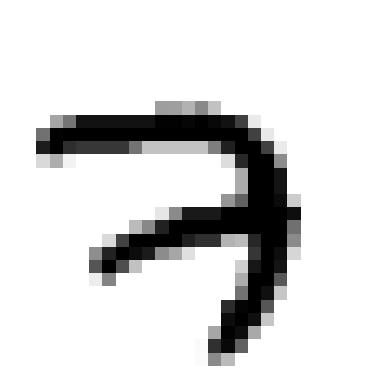

In [11]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [12]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
y_train[0]

7

In [14]:
X_test.shape

(10000, 28, 28)

Validation set contains 5000 images and test set contains 10000 images.

Let's take a look at the sample of images in the dataset:

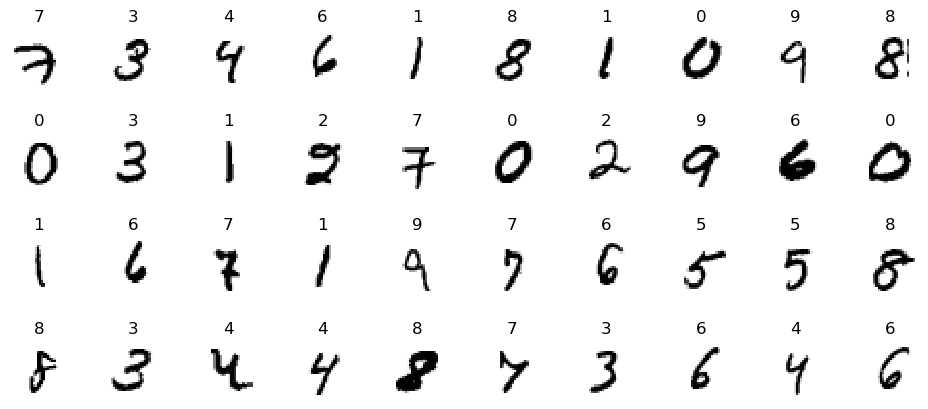

In [15]:
n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2)) # figsize(width, height)

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index+1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(y_train[index], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.8)
plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [16]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate)) 
        # K.get_value() returns the value of variable. We can also directly write, self.model.optimizer.learning_rate instead of K.get_value
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [17]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

We will start with a small learning rate of 1e-3 and grow it by 0.5% at each iteration:

In [19]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch:

In [20]:
history = model.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid), callbacks=[expon_lr])

2023-12-14 20:53:08.748648: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 6s 3ms/step - loss: 15878409660934493778739200.0000 - accuracy: 0.5934 - val_loss: 846772.8125 - val_accuracy: 0.1126


We can now plot the loss as a function of the learning rate:

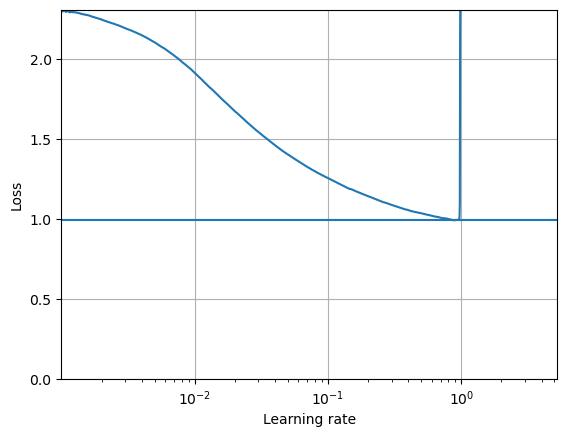

In [21]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale("log")
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates)) # this plots horizontal line at each y from xmin to xmax. Syntax (y, xmin, xmax). So we are just plotting a line for min loss
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0 , expon_lr.losses[0]]) # basically setting the x axis and y axis limit. We want x axis (i.e learning rate) to be min at one point and and max at one point and so the above line
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.show()

In [22]:
min_loss_idx = expon_lr.losses.index(min(expon_lr.losses)) # Index of minimum loss is this
min_loss_idx

1361

In [23]:
expon_lr.rates[min_loss_idx] # This is the learning rate corressponding to minimum loss index. After that loss is increasing violently`

0.8871705

The loss starts shooting up violently when the learning rate goes over certain point. So let's start with the half of the learning rate, when learning rate starts to shoot up.

In [36]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [37]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [38]:
model.compile(loss="sparse_categorical_crossentropy", 
             optimizer=keras.optimizers.SGD(learning_rate=0.8871705/2),
             metrics=["accuracy"])

In [39]:
import os

run_index = 2 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_002'

In [40]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20) # Early stopping stops training when monitored metrics stopped improving. By default, monitored metrics is "val_loss". "patience" = No. of epochs with no improvement after which training will be stopped.
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True) # by default this saves model at the end of every epoch. When save_best_only is set to True, it will save at the end of every epoch if it is the best one seen yet so far. 
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), 
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100


2023-12-14 21:24:52.457379: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 5s 3ms/step - loss: 0.2482 - accuracy: 0.9231 - val_loss: 0.1071 - val_accuracy: 0.9694
Epoch 2/100
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1029 - accuracy: 0.9685 - val_loss: 0.0993 - val_accuracy: 0.9736
Epoch 3/100
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0773 - accuracy: 0.9759 - val_loss: 0.1032 - val_accuracy: 0.9722
Epoch 4/100
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0583 - accuracy: 0.9817 - val_loss: 0.0946 - val_accuracy: 0.9766
Epoch 5/100
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0508 - accuracy: 0.9838 - val_loss: 0.0909 - val_accuracy: 0.9794
Epoch 6/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0412 - accuracy: 0.9867 - val_loss: 0.0908 - val_accuracy: 0.9784
Epoch 7/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0403 - accuracy: 0.9874 - val_loss: 0.0934 - val_accuracy: 0.97

Due to early stopping, training will stop when no improvement occurs.

In [41]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.1044 - accuracy: 0.9757


[0.10436967760324478, 0.9757000207901001]

We got around 97.87% accuracy. Finally let's look at the learning curves using TensorBoard

For running tensorboard, run this command in terminal where `my_mnist_logs` folder lies:

```
tensorboard --logdir=./my_mnist_logs --port=6006
```